<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Fluid_Flow_Animation_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The script below is borrowed from the following URL: https://youtube.com/shorts/_m0SfU4EfHE?si=GOKjETnBOXUEO_GK

In [ ]:
!pip install phiflow

In [2]:
from phi.flow import*

In [9]:
# Define initial condition as a StaggeredGrid with velocity values.
v = StaggeredGrid(
    values = lambda pos: vec(
        x=math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y=-math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x= 2 * PI, y= 2 * PI),
)

In [4]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

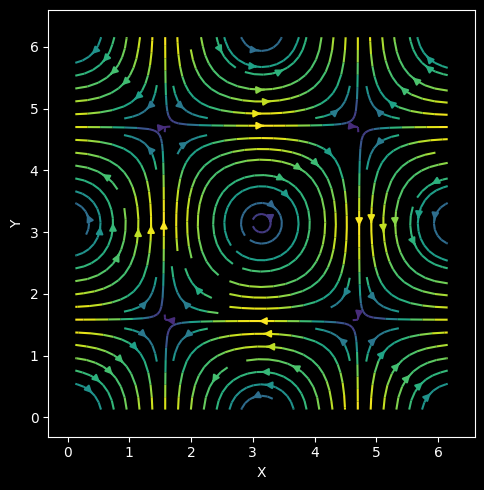

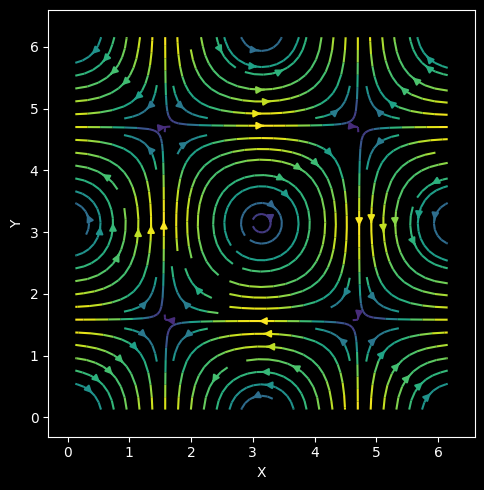

In [10]:
plot(v)

In [6]:
def make_step(v, dt=0.5):
    v = advect.semi_lagrangian(v, v, dt=dt)
    v = diffuse.implicit(v, 0.1, dt)
    v, _ = fluid.make_incompressible(v)
    return v

In [7]:
trj = iterate (make_step, batch(time=20), v)

/usr/local/lib/python3.11/dist-packages/phiml/backend/_linalg.py:337: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(lin[batch], y[batch])  # returns nan when diverges


In [8]:
plot(trj, animate="time", size=(10,10))

<Figure size 640x480 with 0 Axes>